In [1]:
using Plots
using DataFrames
using Queryverse
using CSV

In [2]:
totaltime, totallines = open("/home/joseph/Documentos/Servicio Social/Código/xydiferencias1.dat") do f
    linecounter = 0
    timetaken = @elapsed for l in eachline(f)
        linecounter += 1
    end
    (timetaken, linecounter)
end

(0.000357946, 2000)

In [2]:
f = open("/home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/XY.dat")

IOStream(<file /home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/XY.dat>)

In [3]:
close(f)

In [5]:
lines = readlines(f)

String[]

In [2]:
function dat2csv(dat_path::AbstractString, csv_path::AbstractString)
    open(csv_path, write=true) do io
        for line in eachline(dat_path)
            join(io, split(line), ',')
            println(io)
        end
    end
    return csv_path
end

function dat2csv(dat_path::AbstractString)
    base, ext = splitext(dat_path)
    ext == ".dat" ||
        throw(ArgumentError("file name doesn't end with `.dat`"))
    return dat2csv(dat_path, "$base.csv")
end


dat2csv (generic function with 2 methods)

In [25]:
dat2csv("/home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/XY.dat")

"/home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/XY.csv"

In [26]:
df = CSV.read("/home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/XY.csv", DataFrame);

In [27]:
typeof(df)
names(df)

2-element Array{String,1}:
 "X"
 "Y"

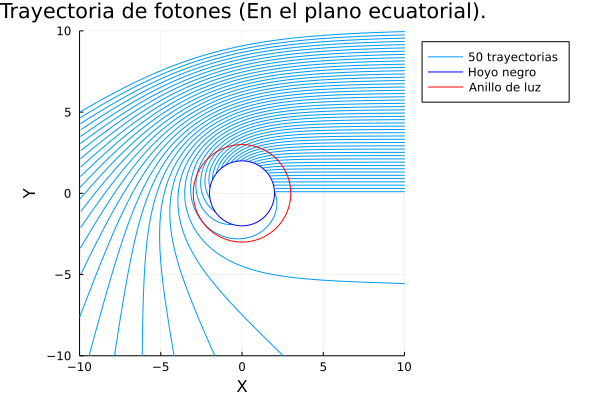

In [28]:
r = 1
k1 = 2
k2 = 3
n = 100
th = Array(0:2*pi/100:2*pi+2*pi/100) # theta from 0 to 2pi ( + a little extra)
X1 = r*k1*cos.(th)
Y1 = r*k1*sin.(th)
X2 = r*k2*cos.(th)
Y2 = r*k2*sin.(th)
ag = plot(df.X, df.Y, xlabel="X", ylabel="Y", title="Trayectoria de fotones (En el plano ecuatorial).", label="50 trayectorias", aspect_ratio=1,legend= :outertopright, xlim=(-10,10),ylim=(-10,10))
     plot!(X1,Y1, c=:blue, label = "Hoyo negro")
     plot!(X2,Y2, c=:red, label = "Anillo de luz")

In [24]:
savefig(ag, "/home/joseph/Documentos/Servicio Social/Código/Diferencias Finitas/agujero3.png")